In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

path = 'gt_t'

img = cv2.imread('gt_t/0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (682, 682))
img = np.rot90(img, 1)
img[(img.shape[0] // 2 - 30):(img.shape[0] // 2 + 30), (img.shape[1] // 2 - 10):(img.shape[1] // 2 + 13)] = 255
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]

new_img = np.zeros((img.shape))

cur_frame_dots = []

for i in range(0, img.shape[0], 7):
    for j in range(0, img.shape[1], 6):
        if img[i, j] == [0, 0, 0]:
            # new_img[i, j] = 255
            cur_frame_dots.append((i, j, 0))
        elif img[i, j] == [255, 0, 0]:
            cur_frame_dots.append((i, j, 1))
        elif img[i, j] == [0, 0, 255]:
            cur_frame_dots.append((i, j, 2))

plt.gray()
# plt.imshow(new_img)
plt.imshow(img)
plt.show()



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


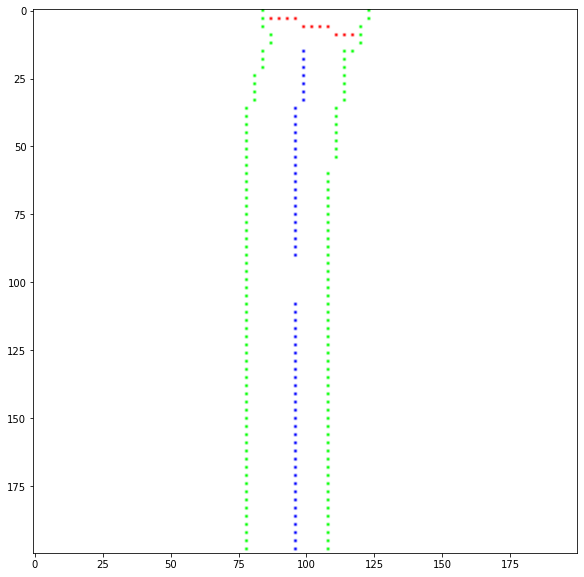

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


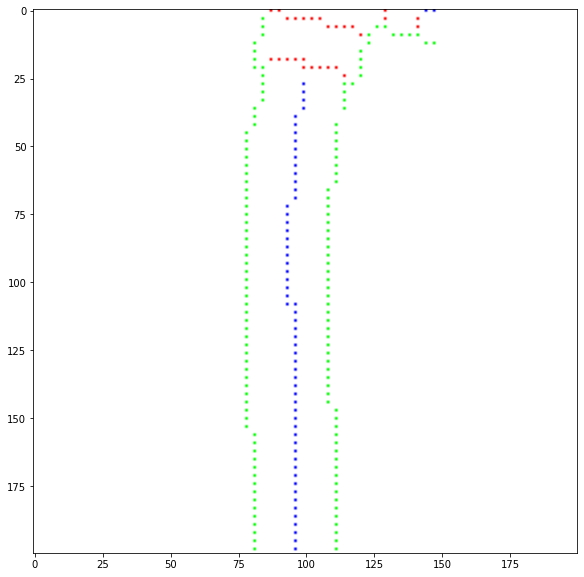

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


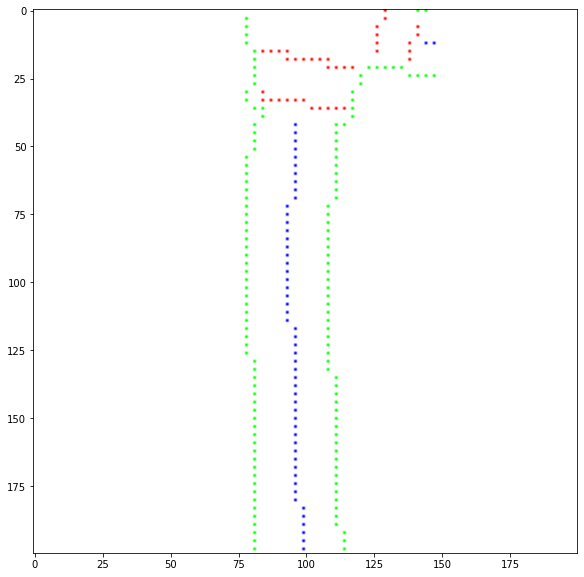

KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

In [49]:
# img segmentation map to sparse dot

import json
import matplotlib.pyplot as plt
import os
import cv2

# path = 'gt_t'
path = '../dummy_imgs/gt_t'
coord_dict = {}

floor_imgs = sorted(os.listdir(path), key=lambda x: int(x.split('.')[0]))

with open('../json/result2ue5.json', 'r') as f:
    data = json.load(f)
    frame_keys = list(data.keys())
    for idx, frame_key in enumerate(frame_keys):

        plt.figure(figsize=(10, 10))

        img = cv2.imread(os.path.join(path, floor_imgs[idx]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (200, 200))
        img = np.rot90(img, 1)
        img[(img.shape[0] // 2 - 8):(img.shape[0] // 2 + 8), (img.shape[1] // 2 - 4):(img.shape[1] // 2 + 3)] = 255
        img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]

        # plt.imshow(img)
        # plt.show()

        new_img = np.ones((img.shape))

        cur_frame_dots = []

        for i in range(0, img.shape[0], 3):
            for j in range(0, img.shape[1], 3):
                if list(img[i, j]) == [0, 0, 0]:
                    cur_frame_dots.append((i, j, 0))
                    # cv2.circle(new_img, (j, i), 1, (0, 255, 0), -1)
                    new_img[i, j] = [0, 255, 0]
                elif list(img[i, j]) == [255, 0, 0]:
                    cur_frame_dots.append((i, j, 1))
                    # cv2.circle(new_img, (j, i), 1, (255, 0, 0), -1)
                    new_img[i, j] = [255, 0, 0]
                elif list(img[i, j]) == [0, 0, 255]:
                    cur_frame_dots.append((i, j, 2))
                    # cv2.circle(new_img, (j, i), 1, (0, 0, 255), -1)
                    new_img[i, j] = [0, 0, 255]

        coord_dict[frame_key] = cur_frame_dots
        plt.imshow(new_img)
        plt.show()
    
# with open('coord.json', 'w') as f:
#     json.dump(coord_dict, f)

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json
import imageio
from IPython.display import Image


with open('../json/result2ue5.json', 'r') as f:
    data = json.load(f)
    f.close()

with open('../json/coord.json', 'r') as f:
    floor_data = json.load(f)
    f.close()

img_arr = []

s_60_frame_idx = 0
s_ped_frame_idx = 5
cone_frame_idx = 31
ar_f_frame_idx = 0
# ar_f2_frame_idx = 8
ar_lf_frame_idx = 8
ar_rf_frame_idx = 4

for idx, frame_key in enumerate(list(data.keys())):
    plt.figure(figsize=(10, 10))  # Set the size of the figure
    img = np.zeros((682, 682, 3), dtype=np.uint8)

    cur_frame_dots = floor_data[frame_key]
    cur_frame_objs = data[frame_key]
    cur_frame_objs_len = len(cur_frame_objs)

    if idx >= s_60_frame_idx:
        d_x = 390
        d_y = 50 + 45 * (idx - s_60_frame_idx)
        if d_x < img.shape[1] and d_y < img.shape[0]:
            cv2.circle(img, (d_x, d_y), 5, (0, 255, 255), -1)
            data[frame_key][cur_frame_objs_len] = {'x': d_x, 'y': d_y, 'track_id' : 999, 'class': 'sign_60', 'distance_ang' : -90, 'traj_point' : []}
            cur_frame_objs_len += 1
    
    if idx >= s_ped_frame_idx:
        d_x = 260
        d_y = 20 + 45 * (idx - s_ped_frame_idx)
        if d_x < img.shape[1] and d_y < img.shape[0]:
            cv2.circle(img, (d_x, d_y), 5, (255, 255, 0), -1)
            data[frame_key][cur_frame_objs_len] = {'x': d_x, 'y': d_y, 'track_id' : 999, 'class': 'sign_ped', 'distance_ang' : -90, 'traj_point' : []}
            cur_frame_objs_len += 1

    if idx >= ar_f_frame_idx:
        d_x = 350
        d_y = 100 + 45 * (idx - ar_f_frame_idx)
        if d_x < img.shape[1] and d_y < img.shape[0]:
            data[frame_key][cur_frame_objs_len] = {'x': d_x, 'y': d_y, 'track_id' : 999, 'class': 'front_arrow', 'distance_ang' : 90, 'traj_point' : []}
            cur_frame_objs_len += 1

    if idx >= ar_rf_frame_idx:
        d_x = 310
        d_y = 100 + 45 * (idx - ar_rf_frame_idx)
        if d_x < img.shape[1] and d_y < img.shape[0]:
            data[frame_key][cur_frame_objs_len] = {'x': d_x, 'y': d_y, 'track_id' : 999, 'class': 'front_right_arrow', 'distance_ang' : -90, 'traj_point' : []}
            cur_frame_objs_len += 1

    if idx >= ar_lf_frame_idx:
        d_x = 350
        d_y = 100 + 15 * (idx - ar_lf_frame_idx) 
        if d_x < img.shape[1] and d_y < img.shape[0]:
            data[frame_key][cur_frame_objs_len] = {'x': d_x, 'y': d_y, 'track_id' : 999, 'class': 'front_left_arrow', 'distance_ang' : 90, 'traj_point' : []}
            cur_frame_objs_len += 1
            data[frame_key][cur_frame_objs_len] = {'x': d_x + 20, 'y': d_y, 'track_id' : 999, 'class': 'front_arrow', 'distance_ang' : 90, 'traj_point' : []}
            cur_frame_objs_len += 1

    if idx >= cone_frame_idx:

        for j in range(5):
            d_x = 405
            d_y = 20 + 20 * j + 45 * (idx - cone_frame_idx)
            if d_x < img.shape[1] and d_y < img.shape[0]:
                cv2.circle(img, (d_x, d_y), 5, (255, 0, 255), -1)
                data[frame_key][cur_frame_objs_len] = {'x': d_x, 'y': d_y, 'track_id' : 999, 'class': 'cone', 'distance_ang' : -90, 'traj_point' : []}
                cur_frame_objs_len += 1

    for dot in cur_frame_dots:
        if dot[2] == 0:
            cv2.circle(img, (dot[1], dot[0]), 1, (0, 255, 0), -1)
        elif dot[2] == 1:
            cv2.circle(img, (dot[1], dot[0]), 1, (255, 0, 0), -1)
        elif dot[2] == 2:
            cv2.circle(img, (dot[1], dot[0]), 1, (0, 0, 255), -1)
    
    
    for obj_key in cur_frame_objs.keys():
        obj_dict = cur_frame_objs[obj_key]
        cv2.circle(img, (int(obj_dict['x']), int(obj_dict['y'])), 3, (255, 255, 255), -1)

        data[frame_key][obj_key]['traj_point'] = []

    print('ID:', idx)
    plt.imshow(img)
    plt.show()


    img_arr.append(img)

# imageio.mimsave('../result2ue5.gif', img_arr, duration=0.1)

with open('../json/result2ue5_add.json', 'w') as f:
    json.dump(data, f)
    f.close()


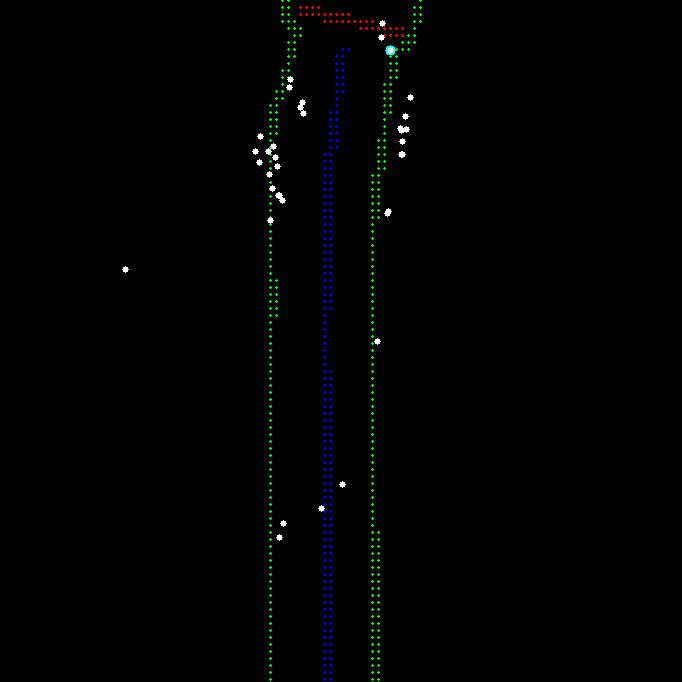

In [3]:
from IPython.display import Image

Image('../result2ue5.gif')




In [30]:
# create mono color texture
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = np.zeros((1024, 1024, 3), np.uint8)
img[:, :, 0] = 255
cv2.imwrite('textures/roadline.png', img)

True

[25.0, 24.9, 24.2, 22.299999999999997, 18.6, 12.5, 6.399999999999995, 2.6999999999999966, 0.8000000000000007, 0.10000000000000009]


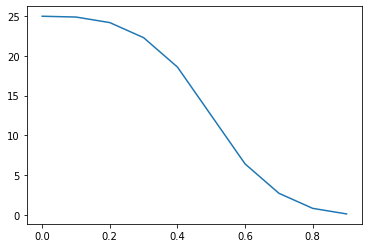

In [32]:
import numpy as np
from easing_functions import *

import numpy as np
import matplotlib.pyplot as plt

a = BounceEaseInOut(start=3, end=1, duration=1)
# b = CubicEaseInOut(start=0, end=1)
c = CubicEaseInOut(start=25, end=0)

x = np.arange(0, 1, 0.1)
# y = np.arange(0, 1, -0.001)

# y1 = list(map(b, y))
y2 = list(map(c, x))

# print(y1)
print(y2)

# plt.plot(y,y1)
plt.plot(x,y2)

In [1]:
import pickle
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import torch
import json
pkl_path = '../json/results_mini.pkl'

with open(pkl_path, 'rb') as f:
    result_all = pickle.load(f)
# result = result[0]['img_bbox']

X, Y, Z, W, L, H, SIN_YAW, COS_YAW, VX, VY, VZ = list(range(11))  # undecoded
CNS, YNS = 0, 1  # centerness and yawness indices in quality
YAW = 6  # decoded

def box3d_to_corners(box3d):
    if isinstance(box3d, torch.Tensor):
        box3d = box3d.detach().cpu().numpy()
    corners_norm = np.stack(np.unravel_index(np.arange(8), [2] * 3), axis=1)
    corners_norm = corners_norm[[0, 1, 3, 2, 4, 5, 7, 6]]
    # use relative origin [0.5, 0.5, 0]
    corners_norm = corners_norm - np.array([0.5, 0.5, 0.5])
    corners = box3d[:, None, [W, L, H]] * corners_norm.reshape([1, 8, 3])

    # rotate around z axis
    rot_cos = np.cos(box3d[:, YAW])
    rot_sin = np.sin(box3d[:, YAW])
    rot_mat = np.tile(np.eye(3)[None], (box3d.shape[0], 1, 1))
    rot_mat[:, 0, 0] = rot_cos
    rot_mat[:, 0, 1] = -rot_sin
    rot_mat[:, 1, 0] = rot_sin
    rot_mat[:, 1, 1] = rot_cos
    corners = (rot_mat[:, None] @ corners[..., None]).squeeze(axis=-1)
    corners += box3d[:, None, :3]
    return corners

    
color_mapping = np.asarray([
    [127, 24, 13],
    [147, 170, 0],
    [89, 51, 21],
    [241, 58, 19],
    [35, 44, 22],
    [112, 224, 255],
    [70, 184, 160],
    [153, 0, 255],
    [71, 255, 0],
    [255, 0, 163],
    [255, 204, 0],
    [0, 255, 235],
    [255, 0, 235],
    [255, 0, 122],
    [255, 245, 0],
    [10, 190, 212],
    [214, 255, 0],
    [0, 204, 255],
    [20, 0, 255],
    [255, 255, 0],
    [0, 153, 255],
    [0, 255, 204],
    [41, 255, 0],
    [173, 0, 255],
    [0, 245, 255],
    [71, 0, 255],
    [0, 255, 184],
    [0, 92, 255],
    [184, 255, 0],
    [255, 214, 0],
    [25, 194, 194],
    [92, 0, 255],
    [220, 220, 220],
    [255, 9, 92],
    [112, 9, 255],
    [8, 255, 214],
    [255, 184, 6],
    [10, 255, 71],
    [255, 41, 10],
    [7, 255, 255],
    [224, 255, 8],
    [102, 8, 255],
    [255, 61, 6],
    [255, 194, 7],
    [0, 255, 20],
    [255, 8, 41],
    [255, 5, 153],
    [6, 51, 255],
    [235, 12, 255],
    [160, 150, 20],
    [0, 163, 255],
    [140, 140, 140],
    [250, 10, 15],
    [20, 255, 0],
])


In [9]:
# Vector map

COLOR_VECTORS = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (0, 255, 255), (255, 0, 255)]
MAP_SCORE_THRESH = 0.3
SCORE_THRESH = 0.3

class_names = [
    'car', 'truck', 'construction_vehicle', 'bus', 'trailer', 'barrier',
    'motorcycle', 'bicycle', 'pedestrian', 'traffic_cone'
]

pts_dict = {}

for idx, result in enumerate(result_all):
    img = np.zeros((256, 256, 3), dtype=np.uint8)
    pts_arr = []

    result = result['img_bbox']

    bboxes = result['boxes_3d']
    for i in range(result['labels_3d'].shape[0]):
        score = result['scores_3d'][i]
        if score < SCORE_THRESH: 
            continue
        color = color_mapping[result['labels_3d'][i]]
        color = tuple(int(c) for c in color)

        # print('cls', class_names[result['labels_3d'][i]])

        
        corners = box3d_to_corners(bboxes)[i, [0, 3, 7, 4, 0]]


        # draw front center line
        forward_center = np.mean(corners[2:4], axis=0)
        center = np.mean(corners[0:4], axis=0)
        x = [forward_center[0], center[0]]
        y = [forward_center[1], center[1]]

        x = [(i / 60 + 0.5) * 256 for i in x]
        y = [(1 - (i / 60 + 0.5)) * 256 for i in y]

        # calculate angle degree
        angle = np.arctan2(y[1] - y[0], x[1] - x[0]) * 180 / np.pi
        
        
        img = cv2.line(img, (int(x[0]), int(y[0]),), (int(x[1]), int(y[1])), color, 1, cv2.LINE_AA)

        # draw bbox
        x = corners[:, 0]
        y = corners[:, 1]

        
        x = (x / 60 + 0.5) * 256
        y = (1 - (y / 60 + 0.5)) * 256
        img = cv2.polylines(img, np.array([np.stack([x, y], axis=1)], dtype=np.int32), isClosed=True, color=color, thickness=1, lineType=cv2.LINE_AA)
    
    for i in range(result['scores'].shape[0]):
        score = result['scores'][i]
        
        if score < MAP_SCORE_THRESH:
            continue
        # print(score)
        color = COLOR_VECTORS[result['labels'][i]]

  
        pts = result['vectors'][i].copy()

        pts[:, 0] = (1 - (pts[:, 0] / 60 + 0.5)) # x
        pts[:, 1] = ((pts[:, 1] / 60 + 0.5)) # y

        # 將道路類別與原本的設定配對一致
        # 0 : side, 1 : crosswalk, 2 : roadline
        # if result['labels'][i] == 0: 
        #     result['labels'][i] = 1
        # elif result['labels'][i] == 1:
        #     result['labels'][i] = 2
        # else:
        #     result['labels'][i] = 0
        result['labels'][i] = (result['labels'][i] + 1) % 3

        pts_arr.append([pts[:, 0].tolist(), pts[:, 1].tolist(), int(result['labels'][i])]) # x, y, class
        
        img = cv2.polylines(img, np.array([pts], dtype=np.int32), isClosed=False, color=color, thickness=1, lineType=cv2.LINE_AA)
        img = cv2.circle(img, (int(pts[0, 0]), int(pts[0, 1])), 2, color, -1)
    
    pts_dict[str(idx)] = pts_arr
    # plt.imshow(img)
    # plt.show()
    
with open('pts.json', 'w') as f:
    json.dump(pts_dict, f)
    
    

In [ ]:
import matplotlib

CMD_LIST = ['Turn Right', 'Turn Left', 'Go Straight']

def draw_planning_pred(result, top_k=3):
    
    # import ipdb; ipdb.set_trace()
    plan_trajs = result['planning'].cpu().numpy()
    num_cmd = 3
    num_mode = plan_trajs.shape[1]
    plan_trajs_ = np.concatenate((np.zeros((num_cmd, num_mode, 1, 2)), plan_trajs), axis=2)
    plan_score_ = result['planning_score'].cpu().numpy()

    # cmd = data['gt_ego_fut_cmd'].argmax()
    result = []
    for cmd in range(3):
        plan_trajs = plan_trajs_[cmd]
        plan_score = plan_score_[cmd]

        sorted_ind = np.argsort(plan_score)[::-1]
      
        sorted_traj = plan_trajs[sorted_ind, :, :2]
        sorted_score = plan_score[sorted_ind]
        norm_score = np.exp(sorted_score[0])
        
        for j in range(top_k - 1, -1, -1):
            viz_traj = sorted_traj[j]
            traj_score = np.exp(sorted_score[j]) / norm_score
        result.append(render_traj(viz_traj, traj_score=traj_score,
                        colormap='autumn', dot_size=50))
    return result

def render_traj(
    future_traj, 
    traj_score=1, 
    colormap='winter', 
    points_per_step=20, 
    dot_size=25
):
    total_steps = (len(future_traj) - 1) * points_per_step + 1
    dot_colors = matplotlib.colormaps[colormap](
        np.linspace(0, 1, total_steps))[:, :3]
    dot_colors = dot_colors * traj_score + \
        (1 - traj_score) * np.ones_like(dot_colors)
    total_xy = np.zeros((total_steps, 2))
    for i in range(total_steps - 1):
        unit_vec = future_traj[i // points_per_step +
                                1] - future_traj[i // points_per_step]
        total_xy[i] = (i / points_per_step - i // points_per_step) * \
            unit_vec + future_traj[i // points_per_step]
    total_xy[-1] = future_traj[-1]

    return total_xy
    

def draw_motion_pred(result, top_k=1):
       
    bboxes = result['boxes_3d']
    labels = result['labels_3d']
    for i in range(result['labels_3d'].shape[0]):
        score = result['scores_3d'][i]
        if score < SCORE_THRESH: 
            continue
        label = labels[i]
        vehicle_id_list = [0, 1, 2, 3, 4, 6, 7]
        if label in vehicle_id_list:
            dot_size = 150
        else:
            dot_size = 25

        traj_score = result['trajs_score'][i].numpy()
        traj = result['trajs_3d'][i].numpy()
        num_modes = len(traj_score)
        center = bboxes[i, :2][None, None].repeat(num_modes, 1, 1).numpy()
        traj = np.concatenate([center, traj], axis=1)

        sorted_ind = np.argsort(traj_score)[::-1]
        sorted_traj = traj[sorted_ind, :, :2]
        sorted_score = traj_score[sorted_ind]
        norm_score = np.exp(sorted_score[0])
        
        
        viz_traj = sorted_traj[0]
        traj_score = np.exp(sorted_score[0])/norm_score
        return render_traj(viz_traj, traj_score=traj_score,
                            colormap='winter', dot_size=dot_size)

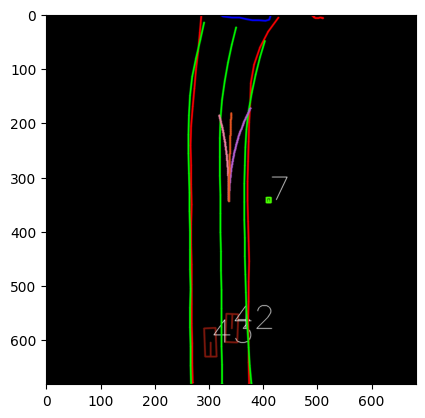

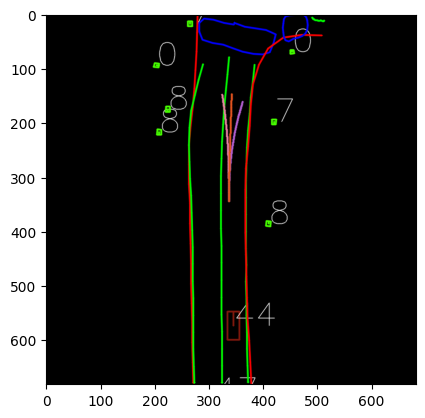

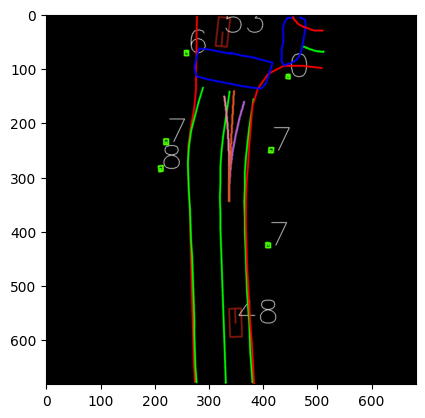

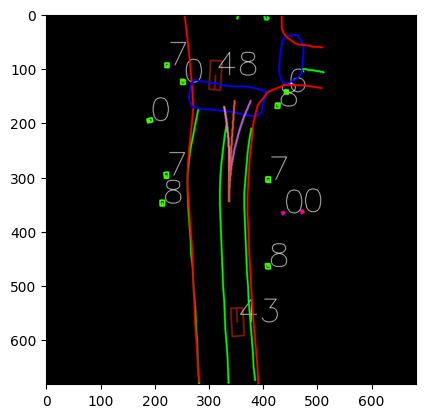

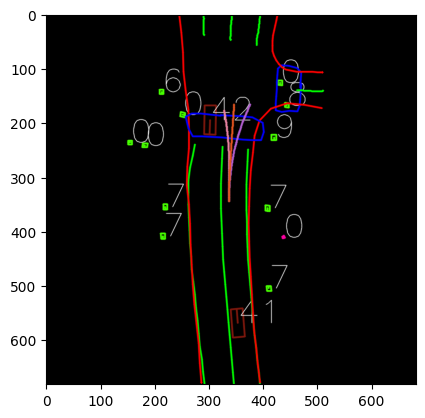

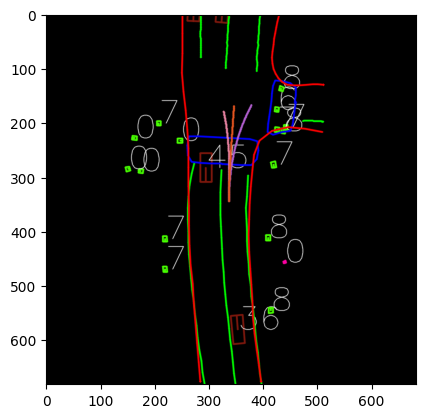

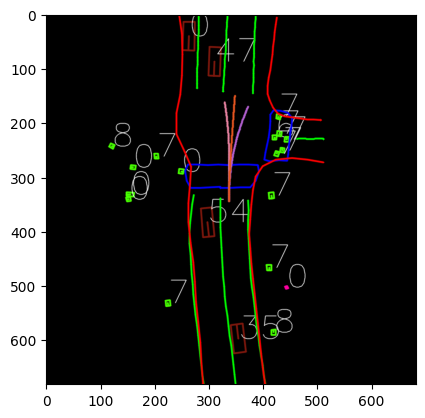

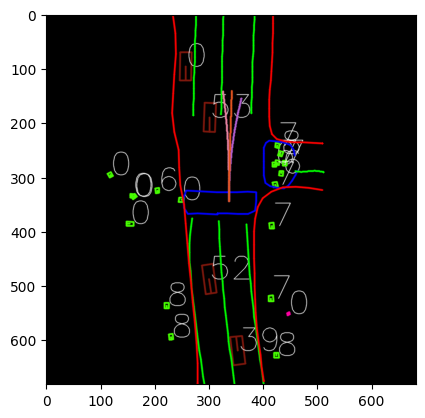

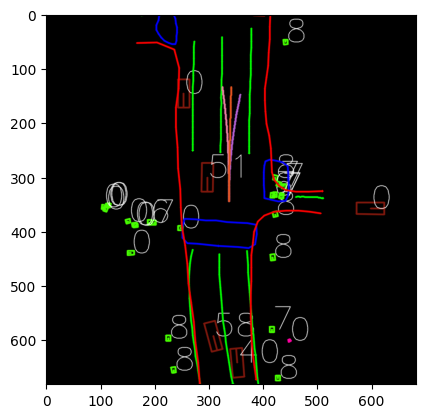

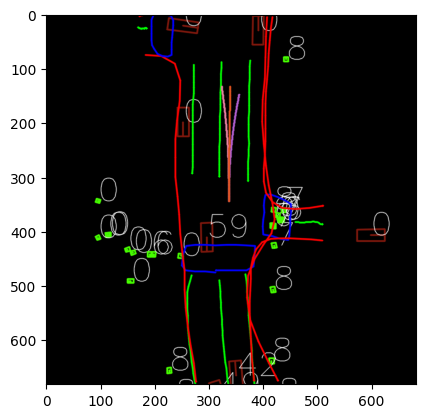

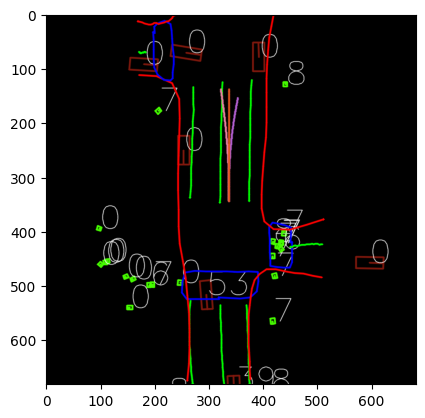

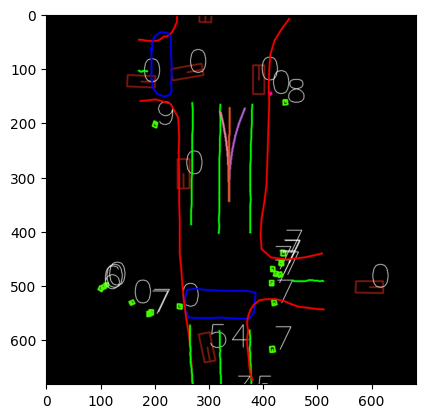

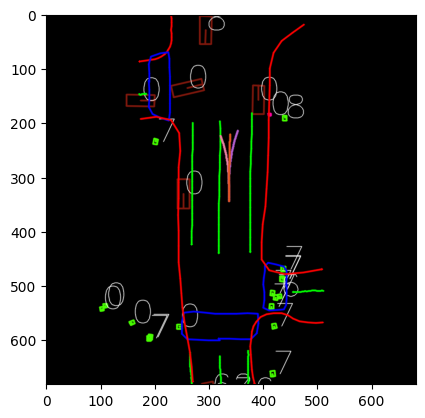

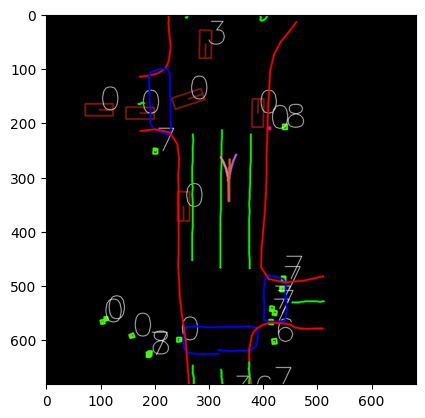

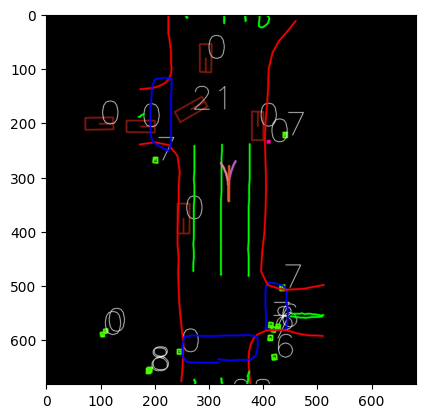

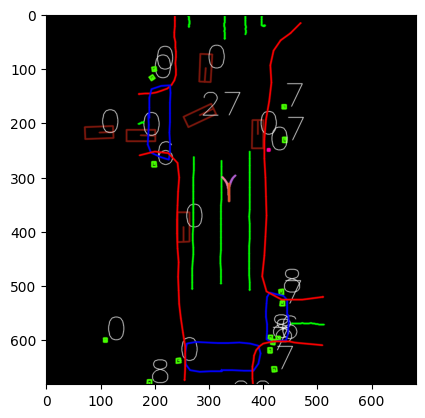

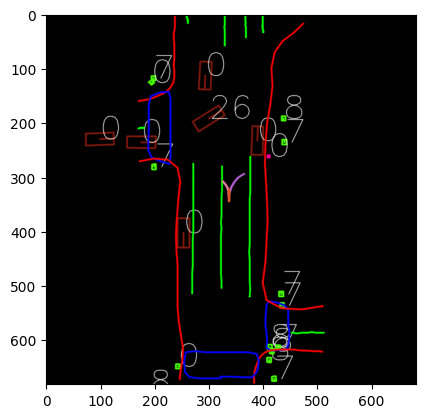

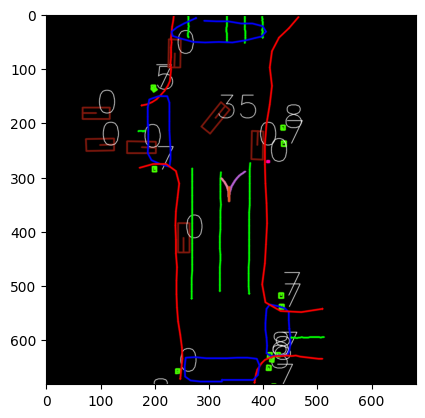

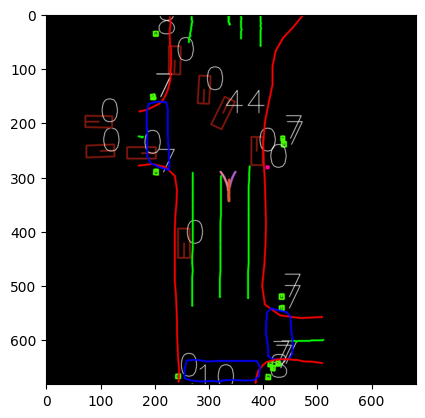

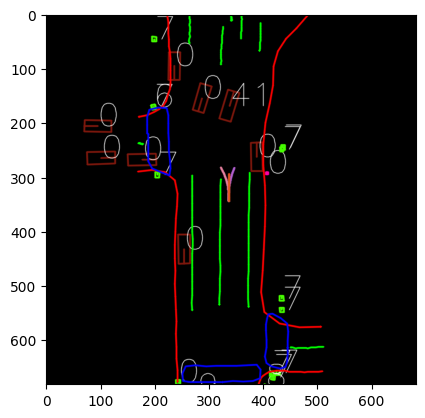

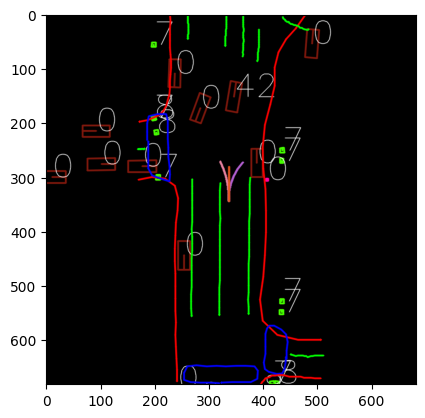

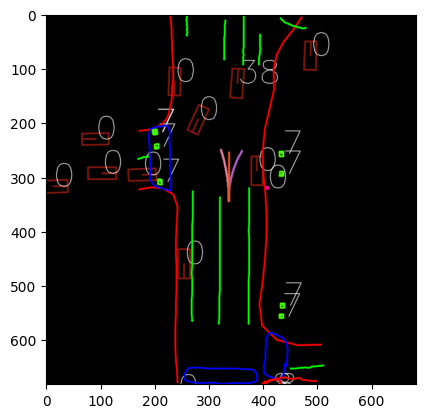

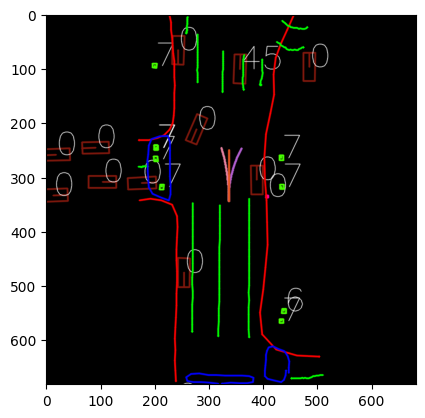

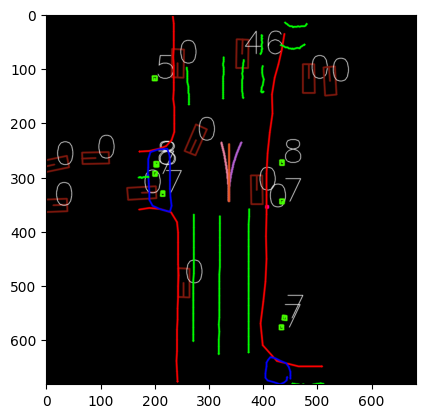

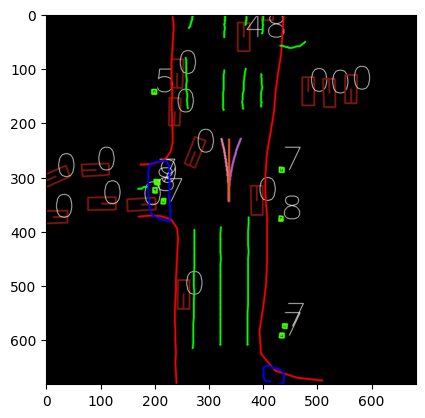

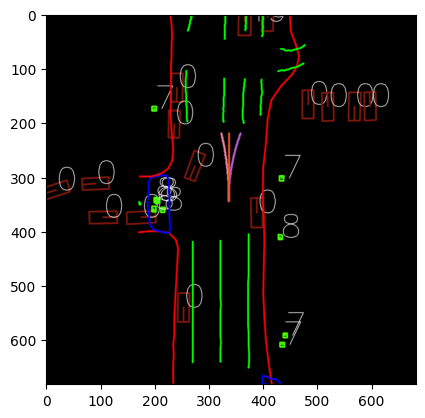

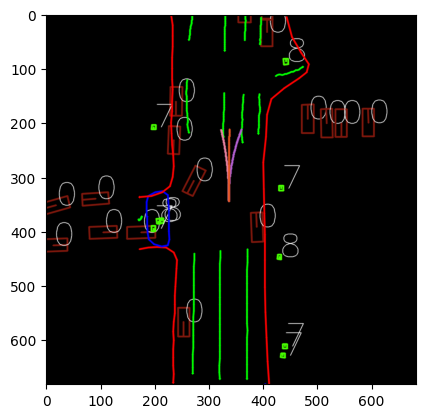

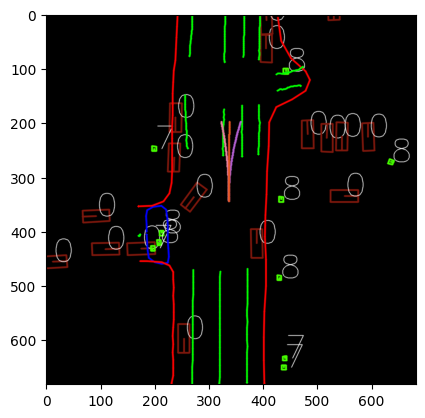

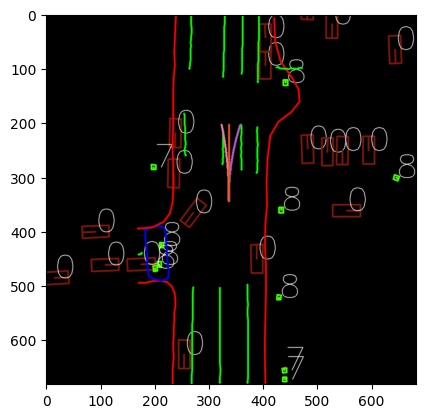

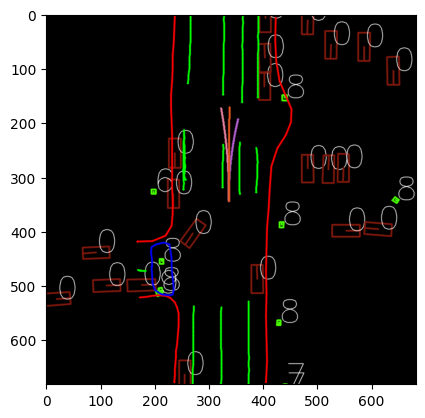

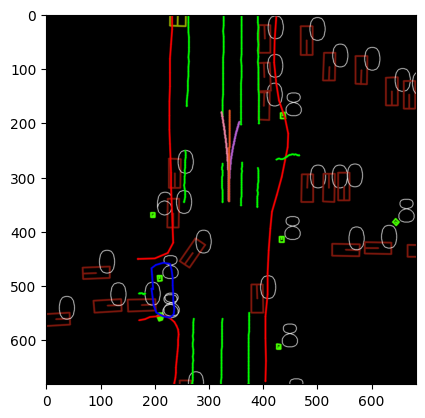

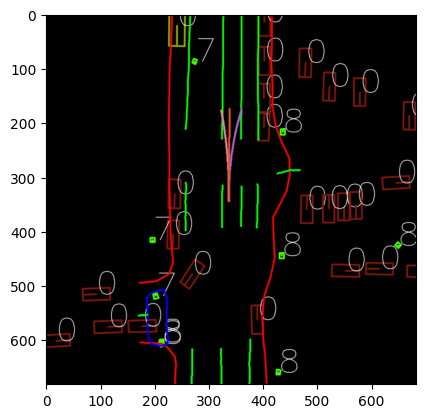

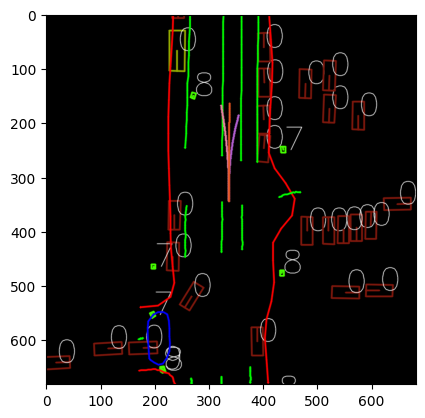

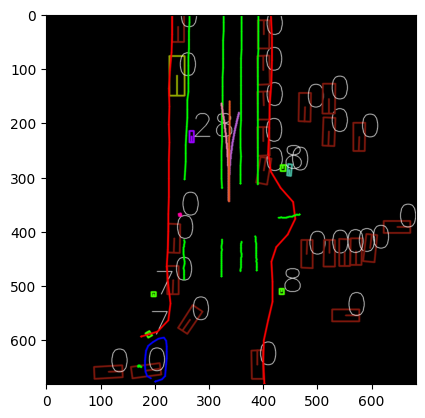

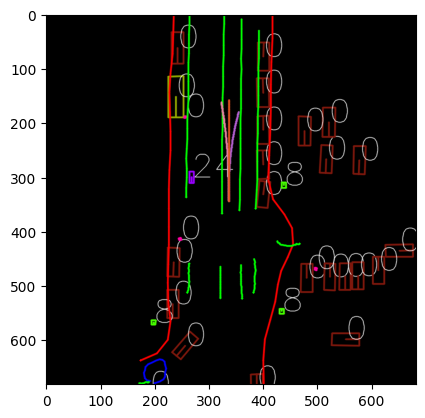

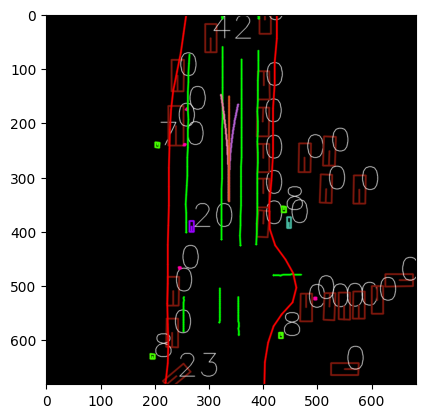

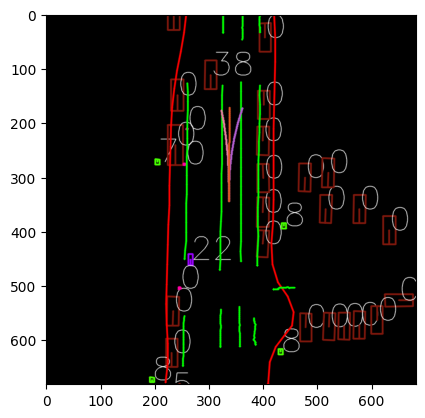

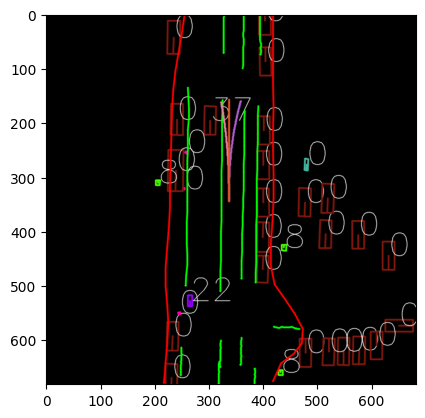

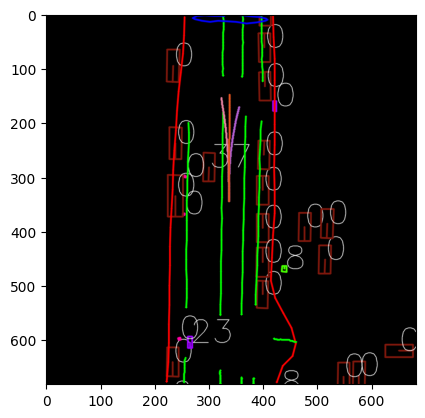

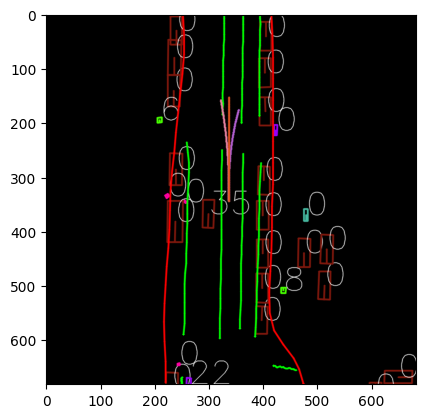

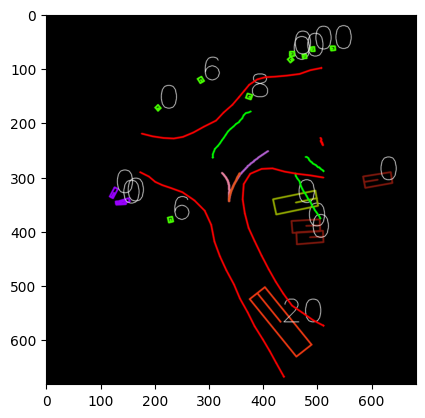

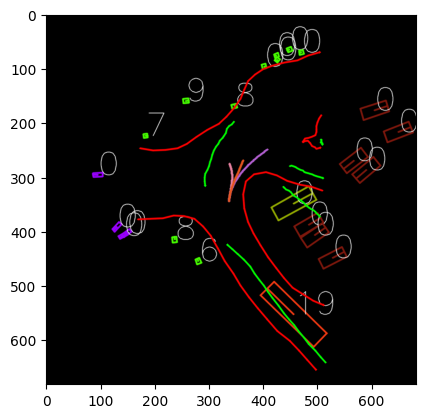

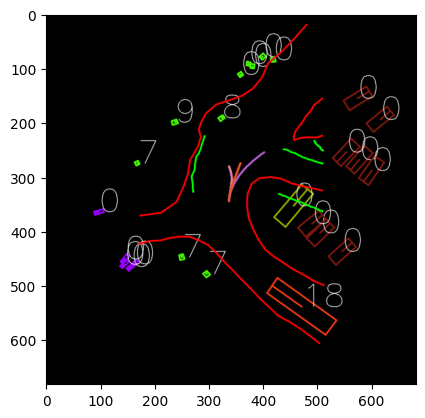

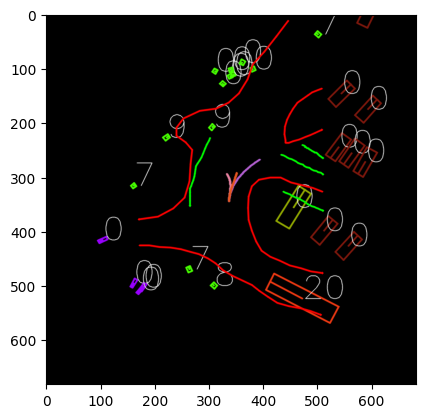

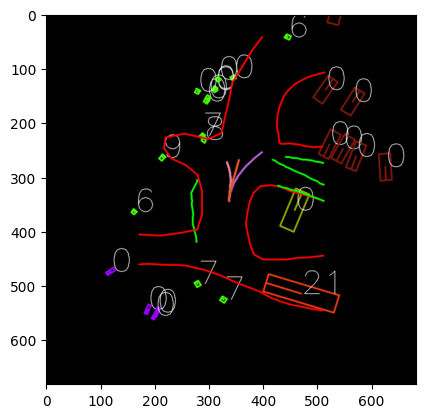

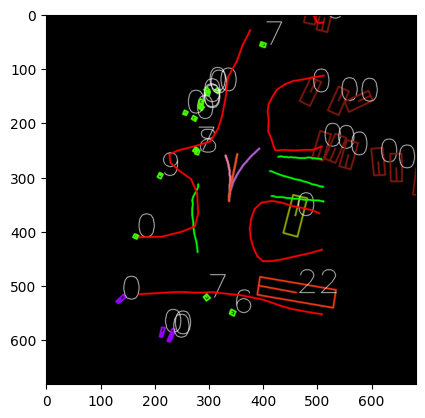

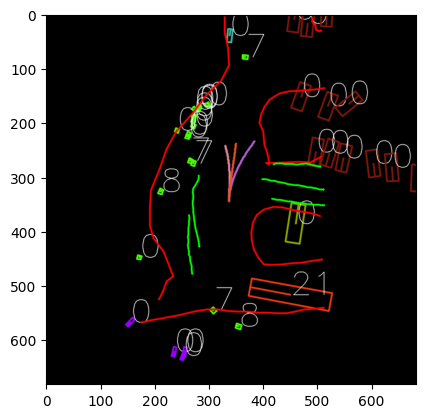

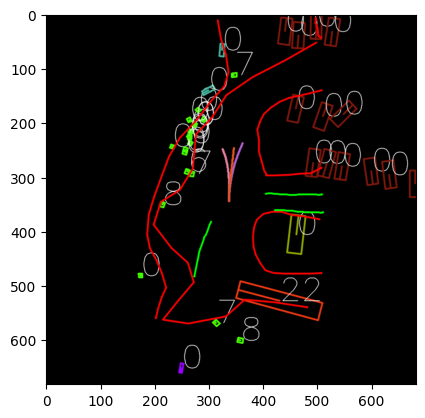

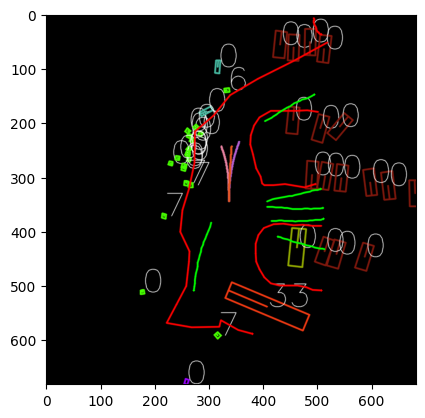

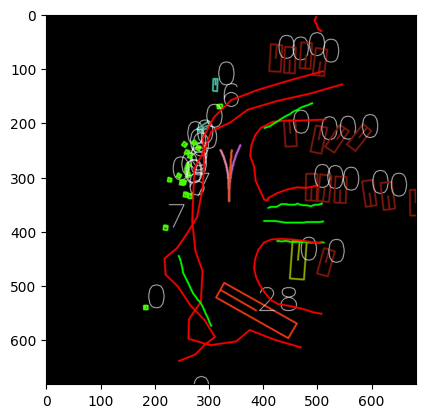

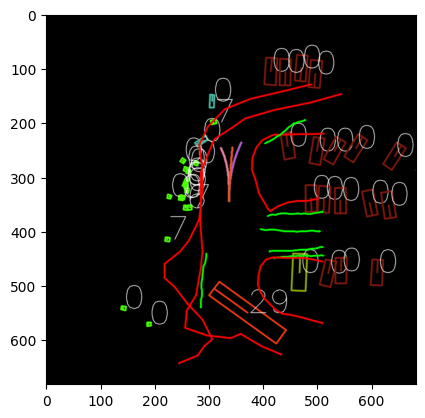

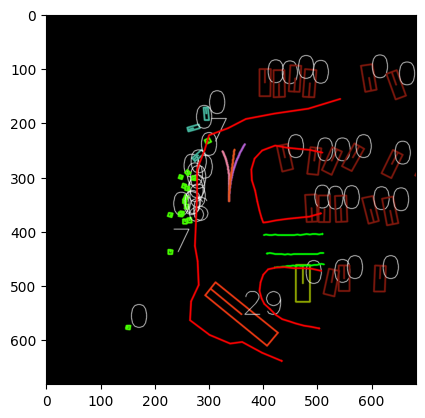

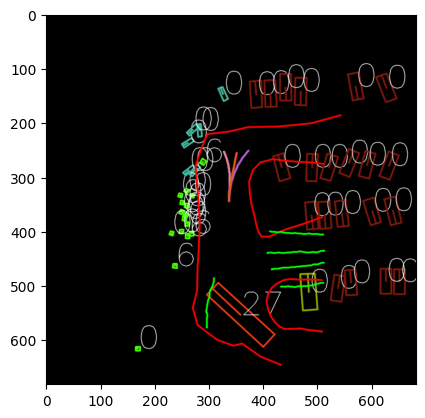

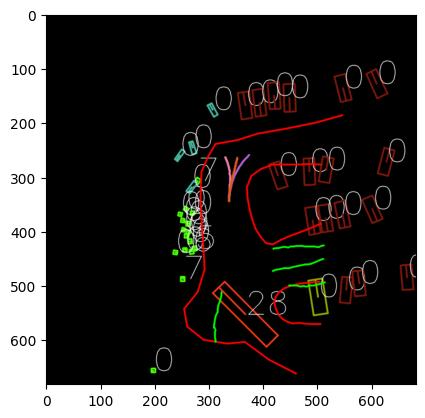

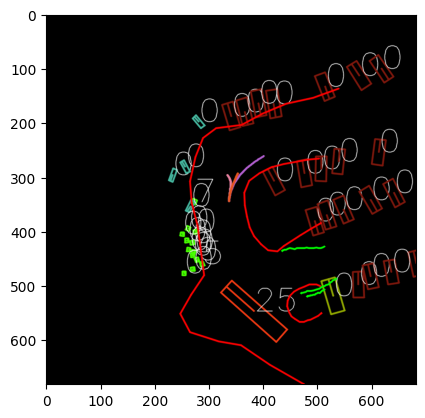

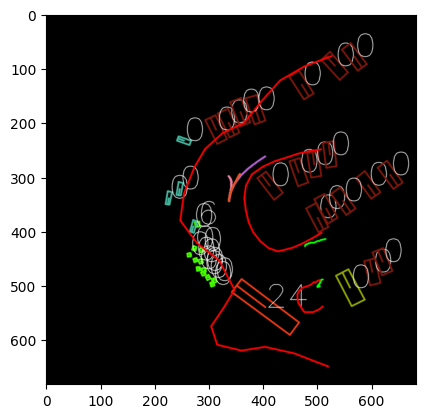

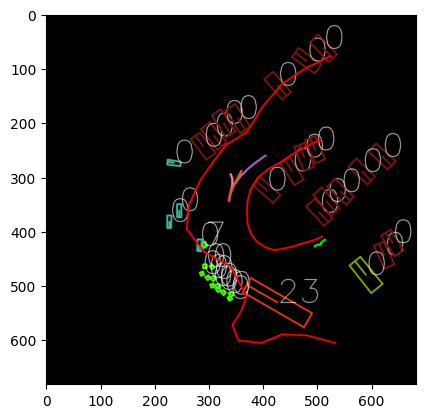

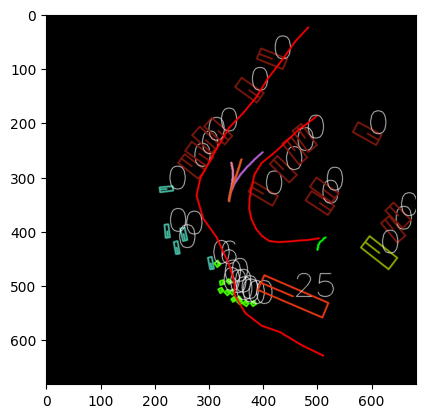

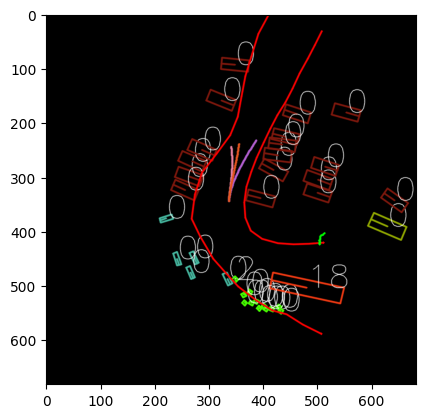

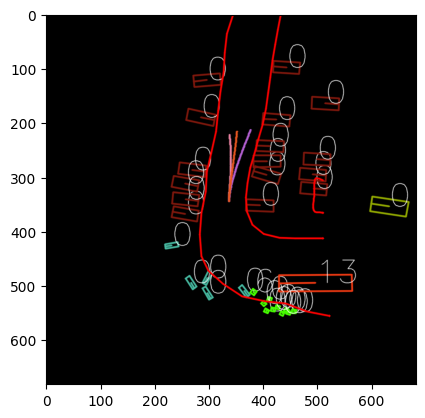

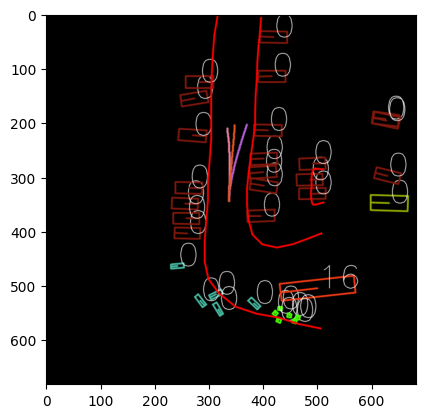

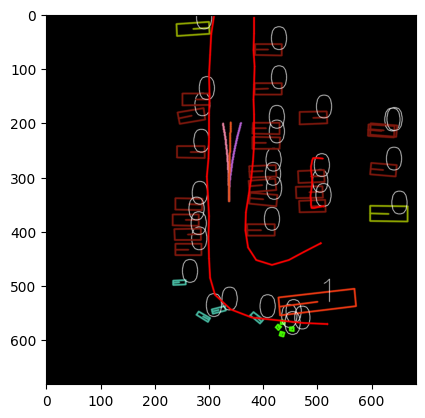

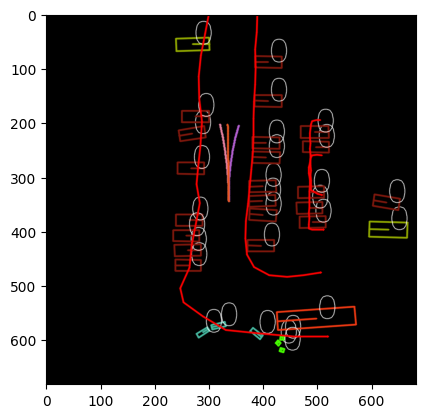

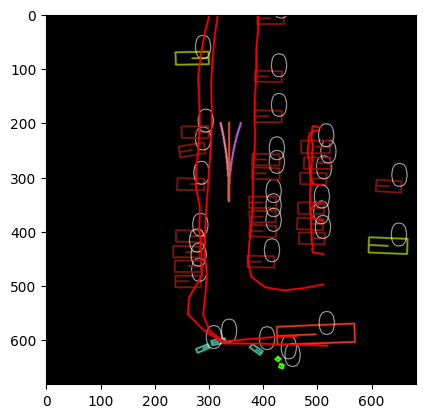

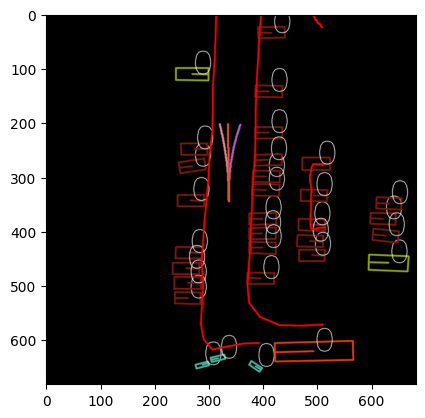

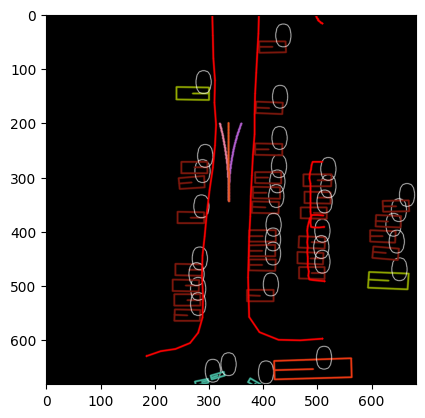

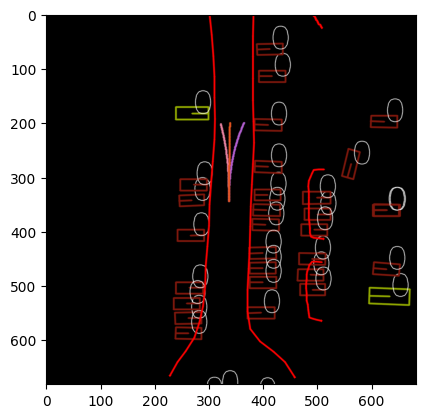

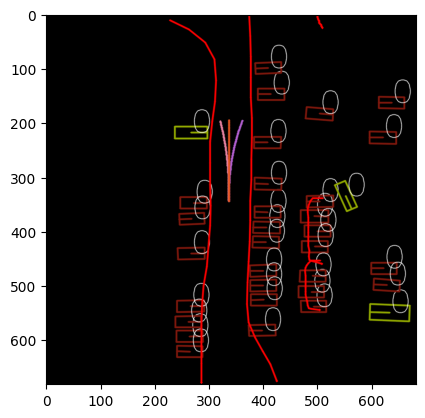

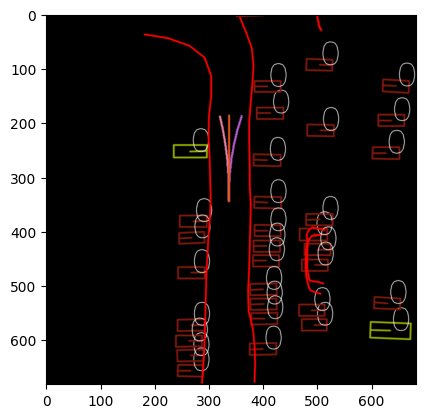

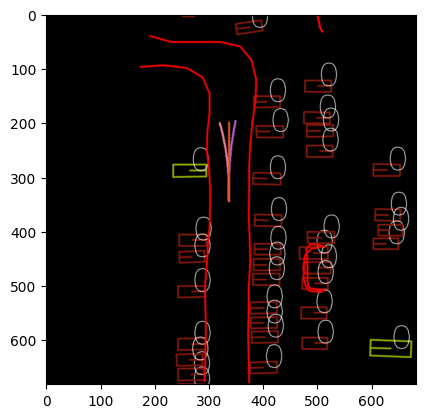

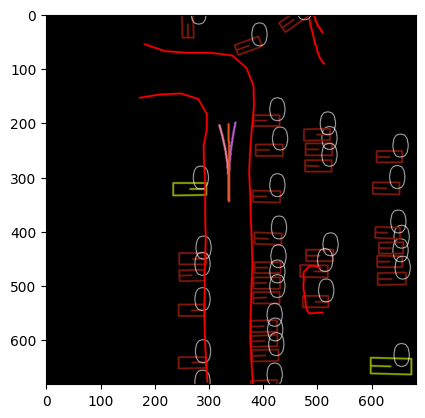

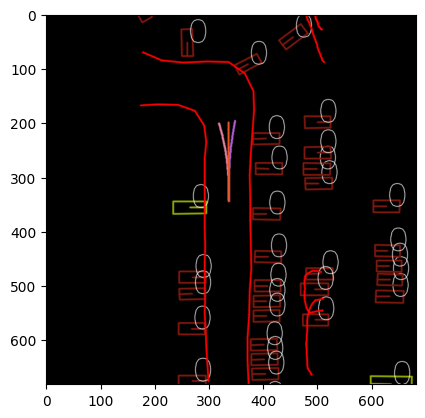

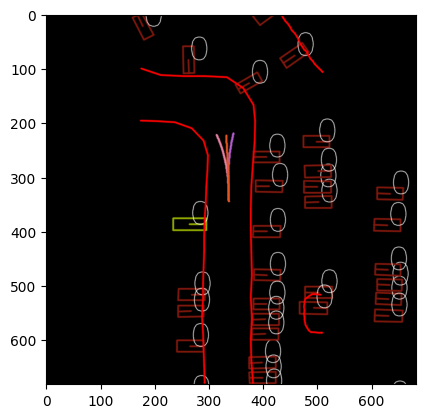

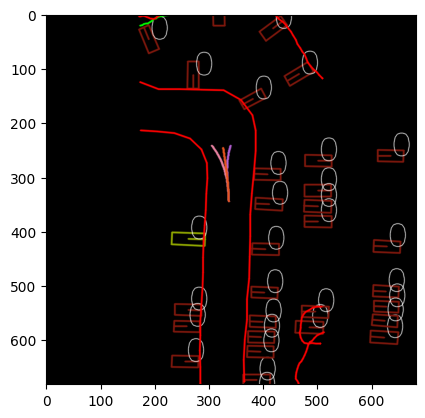

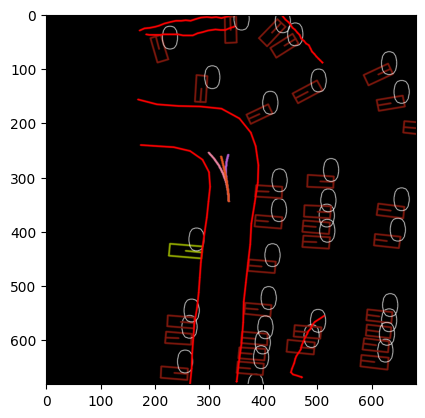

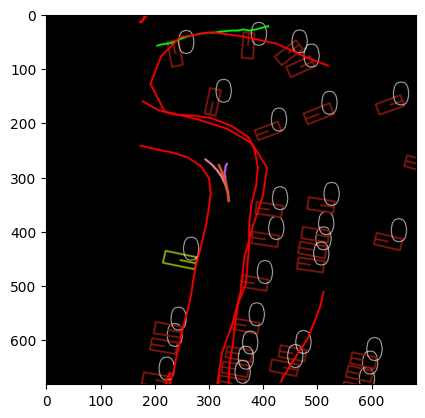

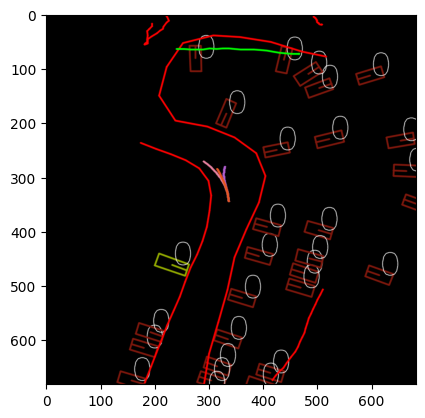

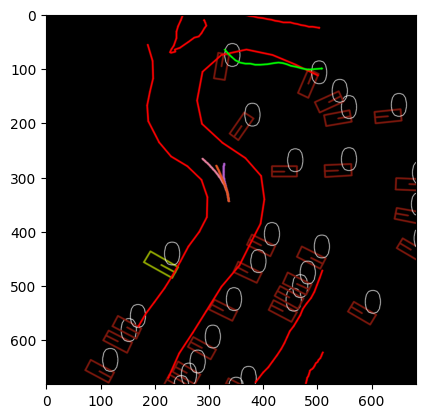

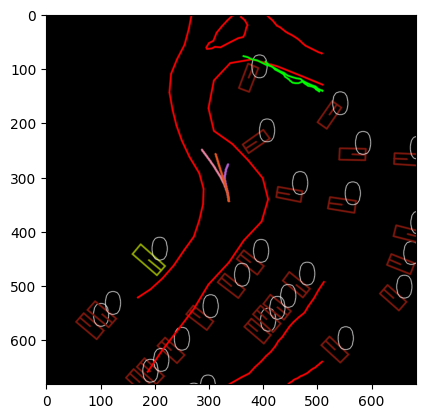

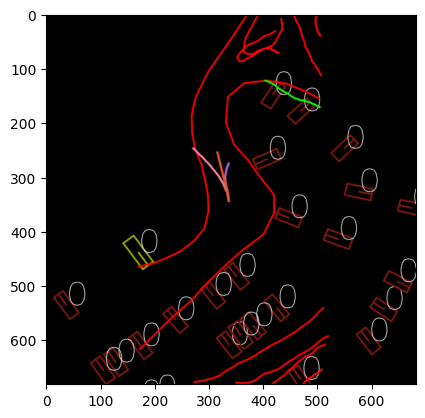

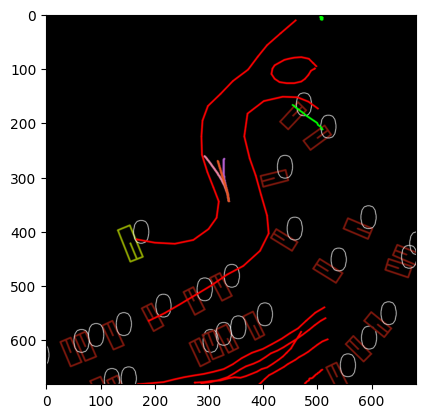

In [85]:
# traj

import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2
MAP_SIZE = 682
COLOR_VECTORS = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (0, 255, 255), (255, 0, 255)]
MAP_SCORE_THRESH = 0.3
SCORE_THRESH = 0.3

traj_dict = {}

pkl_path = '../json/results_mini.pkl'

with open(pkl_path, 'rb') as f:
    result_all = pickle.load(f)

# 遍歷每一幀
for idx, result in enumerate(result_all):
    # plt.figure(figsize=(10, 10))
    img = np.zeros((MAP_SIZE, MAP_SIZE, 3), dtype=np.uint8)

    result = result['img_bbox']

    bboxes = result['boxes_3d']

    labels = result['labels_3d']

    # 遍歷當前幀的所有object
    for i in range(result['labels_3d'].shape[0]):
        score = result['scores_3d'][i]
        if score < SCORE_THRESH: 
            continue
        color = color_mapping[result['labels_3d'][i]]
        color = tuple(int(c) for c in color)
        # print('cls', result['labels_3d'][i])

        
        corners = box3d_to_corners(bboxes)[i, [0, 3, 7, 4, 0]]


        # draw front center line
        forward_center = np.mean(corners[2:4], axis=0)
        center_o = np.mean(corners[0:4], axis=0)
        x = [forward_center[0], center_o[0]]
        y = [forward_center[1], center_o[1]]

        x = [(i / 60 + 0.5) * MAP_SIZE for i in x]
        y = [(1 - (i / 60 + 0.5)) * MAP_SIZE for i in y]
        
        img = cv2.line(img, (int(x[0]), int(y[0]),), (int(x[1]), int(y[1])), color, 2, cv2.LINE_AA)

        # draw bbox
        x = corners[:, 0]
        y = corners[:, 1]

        
        x = (x / 60 + 0.5) * MAP_SIZE
        y = (1 - (y / 60 + 0.5)) * MAP_SIZE
        img = cv2.polylines(img, np.array([np.stack([x, y], axis=1)], dtype=np.int32), isClosed=True, color=color, thickness=2, lineType=cv2.LINE_AA)

        label = labels[i]
        vehicle_id_list = [0, 1, 2, 3, 4, 6, 7]
        if label in vehicle_id_list:
            dot_size = 150
        else:
            dot_size = 25

        traj_score = result['trajs_score'][i].numpy()
        traj = result['trajs_3d'][i].numpy()
        num_modes = len(traj_score)
        center = bboxes[i, :2][None, None].repeat(num_modes, 1, 1).numpy()
        traj = np.concatenate([center, traj], axis=1)

        sorted_ind = np.argsort(traj_score)[::-1]
        sorted_traj = traj[sorted_ind, :, :2]
        sorted_score = traj_score[sorted_ind]
        norm_score = np.exp(sorted_score[0])
        
        
        viz_traj = sorted_traj[0]
        traj_score = np.exp(sorted_score[0])/norm_score

        head2end_dis = int(np.linalg.norm(viz_traj[0] - viz_traj[-1]))

        cv2.putText(img, str(head2end_dis), (int((center_o[0] / 60 + 0.5) * MAP_SIZE), int((1 - (center_o[1] / 60 + 0.5)) * MAP_SIZE)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 1, cv2.LINE_AA)


    # draw vector map
    for i in range(result['scores'].shape[0]):
        score = result['scores'][i]
        if  score < MAP_SCORE_THRESH:
            continue
        color = COLOR_VECTORS[result['labels'][i]]
        # color = (0, 0, 255)
        pts = result['vectors'][i].copy()
        pts[:, 0] = (pts[:, 0] / 60 + 0.5) * MAP_SIZE # x
        pts[:, 1] = (1 - (pts[:, 1] / 60 + 0.5)) * MAP_SIZE # y

    
        img = cv2.polylines(img, np.array([pts], dtype=np.int32), isClosed=False, color=color, thickness=2, lineType=cv2.LINE_AA)
        img = cv2.circle(img, (int(pts[0, 0]), int(pts[0, 1])), 2, color, -1)
    
    traj_all = draw_planning_pred(result)

    traj_dict[str(idx)] = [traj.tolist() for traj in traj_all]
    
    # draw motion pred
    # traj = np.mean(traj_all, axis=0)
    colors = [(179, 96, 209), (232, 130, 161), (230, 85, 32)]
    for i, traj in enumerate(traj_all):

        traj = -traj + 0.5
        traj[:, 0] = -traj[:, 0]
        traj *= 8
        traj += MAP_SIZE // 2


        img = cv2.polylines(img, np.array([traj], dtype=np.int32), isClosed=False, color=colors[i], thickness=2, lineType=cv2.LINE_AA)

    

    
    plt.imshow(img)
    plt.show()
    # break
    


In [ ]:
result['instance_ids'].shape

In [84]:
# other car traj

import os
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2

MAP_SIZE = 682
COLOR_VECTORS = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (0, 255, 255), (255, 0, 255)]
MAP_SCORE_THRESH = 0.3
SCORE_THRESH = 0.3
CLASS = ['car', 'truck', 'construction_vehicle', 'bus', 'trailer', 'barrier', 'motorcycle', 'bicycle', 'pedestrian', 'traffic_cone']
ori_json_path = '../json/result2ue5_v3.json'

with open(ori_json_path, 'r') as f:
    ori_data = json.load(f)






traj_dict = {}

pkl_path = '../json/results_mini.pkl'

with open(pkl_path, 'rb') as f:
    result_all = pickle.load(f)

    
# for key in list(ori_data.keys()):
#     print(key)


all_frame_dict = {}
print(len(result_all), len(ori_data))
# 遍歷每一幀
for idx, result in enumerate(result_all[:-1]):

    key = list(ori_data.keys())[idx]
    # plt.figure(figsize=(10, 10))
    img = np.zeros((MAP_SIZE, MAP_SIZE, 3), dtype=np.uint8)

    result = result['img_bbox']

    bboxes = result['boxes_3d']

    labels = result['labels_3d']

    # 遍歷當前幀的所有object
    obj_idx = 0
    obj_dict = {}
    for i in range(result['labels_3d'].shape[0]):
        score = result['scores_3d'][i]
        if score < SCORE_THRESH: 
            continue
        
        color = color_mapping[result['labels_3d'][i]]
        color = tuple(int(c) for c in color)
        # print('cls', result['labels_3d'][i])

        
        corners = box3d_to_corners(bboxes)[i, [0, 3, 7, 4, 0]]


        # draw front center line
        forward_center = np.mean(corners[2:4], axis=0)
        center_o = np.mean(corners[0:4], axis=0)
        x = [forward_center[0], center_o[0]]
        y = [forward_center[1], center_o[1]]


        # calculate angle degree
        angle = np.arctan2(y[1] - y[0], x[1] - x[0]) * 180 / np.pi

        x = [(i / 60 + 0.5) * MAP_SIZE for i in x]
        y = [(1 - (i / 60 + 0.5)) * MAP_SIZE for i in y]


        # keep center coordinate
        c_x = int(x[1])
        c_y = int(y[1])


        img = cv2.line(img, (int(x[0]), int(y[0]),), (int(x[1]), int(y[1])), color, 2, cv2.LINE_AA)

        # draw bbox
        x = corners[:, 0]
        y = corners[:, 1]

        
        x = (x / 60 + 0.5) * MAP_SIZE
        y = (1 - (y / 60 + 0.5)) * MAP_SIZE
        img = cv2.polylines(img, np.array([np.stack([x, y], axis=1)], dtype=np.int32), isClosed=True, color=color, thickness=2, lineType=cv2.LINE_AA)

        label = labels[i]
        vehicle_id_list = [0, 1, 2, 3, 4, 6, 7]
        if label in vehicle_id_list:
            dot_size = 150
        else:
            dot_size = 25

        traj_score = result['trajs_score'][i].numpy()
        traj = result['trajs_3d'][i].numpy()
        num_modes = len(traj_score)
        center = bboxes[i, :2][None, None].repeat(num_modes, 1, 1).numpy()
        traj = np.concatenate([center, traj], axis=1)

        sorted_ind = np.argsort(traj_score)[::-1]
        sorted_traj = traj[sorted_ind, :, :2]
        sorted_score = traj_score[sorted_ind]
        norm_score = np.exp(sorted_score[0])
        
        
        viz_traj = sorted_traj[0]
        traj_score = np.exp(sorted_score[0])/norm_score

        head2end_dis = int(np.linalg.norm(viz_traj[0] - viz_traj[-1]))

        if head2end_dis < 10:
            is_stop = 1
        else:
            is_stop = 0

        obj_dict[str(obj_idx)] = {
            'x' : c_x,
            'y' : c_y,
            'class' : CLASS[label],
            'distance_ang' : angle + 180,
            'stop' : is_stop,
        }

        cv2.putText(img, str(head2end_dis), (int((center_o[0] / 60 + 0.5) * MAP_SIZE), int((1 - (center_o[1] / 60 + 0.5)) * MAP_SIZE)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 1, cv2.LINE_AA)
        obj_idx += 1
    all_frame_dict[key] = obj_dict
    # draw vector map
    for i in range(result['scores'].shape[0]):
        score = result['scores'][i]
        if  score < MAP_SCORE_THRESH:
            continue
        color = COLOR_VECTORS[result['labels'][i]]
        # color = (0, 0, 255)
        pts = result['vectors'][i].copy()
        pts[:, 0] = (pts[:, 0] / 60 + 0.5) * MAP_SIZE # x
        pts[:, 1] = (1 - (pts[:, 1] / 60 + 0.5)) * MAP_SIZE # y

    
        img = cv2.polylines(img, np.array([pts], dtype=np.int32), isClosed=False, color=color, thickness=2, lineType=cv2.LINE_AA)
        img = cv2.circle(img, (int(pts[0, 0]), int(pts[0, 1])), 2, color, -1)
    
    traj_all = draw_planning_pred(result)

    traj_dict[str(idx)] = [traj.tolist() for traj in traj_all]
    
    # draw motion pred
    # traj = np.mean(traj_all, axis=0)
    colors = [(179, 96, 209), (232, 130, 161), (230, 85, 32)]
    for i, traj in enumerate(traj_all):

        traj = -traj + 0.5
        traj[:, 0] = -traj[:, 0]
        traj *= 8
        traj += MAP_SIZE // 2


        img = cv2.polylines(img, np.array([traj], dtype=np.int32), isClosed=False, color=colors[i], thickness=2, lineType=cv2.LINE_AA)

    
with open('result_vec.json', 'w') as f:
    json.dump(all_frame_dict, f)
    

81 80


In [3]:
# mp4 2 img
import cv2
import os

path = '../data/carla/vid/car_front_1.mp4'

vidcap = cv2.VideoCapture(path)
success,image = vidcap.read()
count = 0
name_count = 0
print(success)
while success:
  if count % 5 == 0:
    cv2.imwrite("../data/carla/img/%d.jpg" % name_count, image)     # save frame as JPEG file
    name_count += 1
  success,image = vidcap.read()

  count += 1


True


In [15]:
import json

with open('../json/detections_new.json', 'r') as f:
    data = json.load(f)

new_dict = {}
name_cnt = 0

for k, v in data.items():
    if int(k) % 5 == 0:
        new_dict[str(name_cnt)] = {}
        for i, obj in v.items():
            new_dict[str(name_cnt)][i] = {'x': obj['x'] * 1920, 'y': obj['y'] * 960, 'w': obj['w'] * 1920, 'h': obj['h'] * 960, 'cls': obj['cls']}
        # new_dict[str(name_cnt)] = v
        name_cnt += 1
    # break

with open('../json/carla_2d_bbox_new.json', 'w') as f:
    json.dump(new_dict, f)


131